# MLP: Multilayer Perceptrón
```
Versión   : 1.5, Para uso educativo
Autor     : Luis Beltran Palma Ttito
Lugar     : Cusco, Perú, 2023.
Proposito : Uso de MLP
Problema  : Clasificación de 7 expresiones faciales
```

# 1. Librería

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Perceptrón multicapa para clasificación
from sklearn.neural_network import MLPClassifier

# 2. Importar datos

In [2]:
datos = pd.read_csv('./EXPRESION_FACIAL_NORM.csv',
                    delimiter=',',header=0)
datos.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
0,0.703397,0.728325,0.704796,0.714611,0.738141,0.720482,0.733065,0.753209,0.716761,0.766871,...,0.267455,0.215121,0.400603,0.454687,0.447409,0.584091,0.646530,0.577891,0.601689,asco
1,0.838330,0.498812,0.173024,0.325406,0.338867,0.432472,0.606465,0.523004,0.442311,0.427956,...,0.756342,0.757213,0.755264,0.747420,0.742933,0.740961,0.742628,0.744577,0.744577,asco
2,0.179827,0.179827,0.152376,0.152376,0.164974,0.164408,0.108367,0.414800,0.437459,0.180585,...,0.427801,0.531436,0.418529,0.375095,0.430815,0.451807,0.487101,0.543975,0.520445,asco
3,0.975838,0.976403,0.994933,0.982372,0.993884,0.942644,0.601467,0.411795,0.640875,0.729047,...,0.365246,0.377071,0.304854,0.102674,0.064329,0.111403,0.166871,0.097964,0.094042,asco
4,0.718695,0.699131,0.491645,0.439356,0.231312,0.002247,0.039819,0.018247,0.005894,0.027451,...,0.247870,0.180125,0.126094,0.060833,0.309835,0.338424,0.055305,0.083055,0.088138,asco


In [3]:
XX = datos.drop(['2304'], axis=1)
yy = datos['2304']

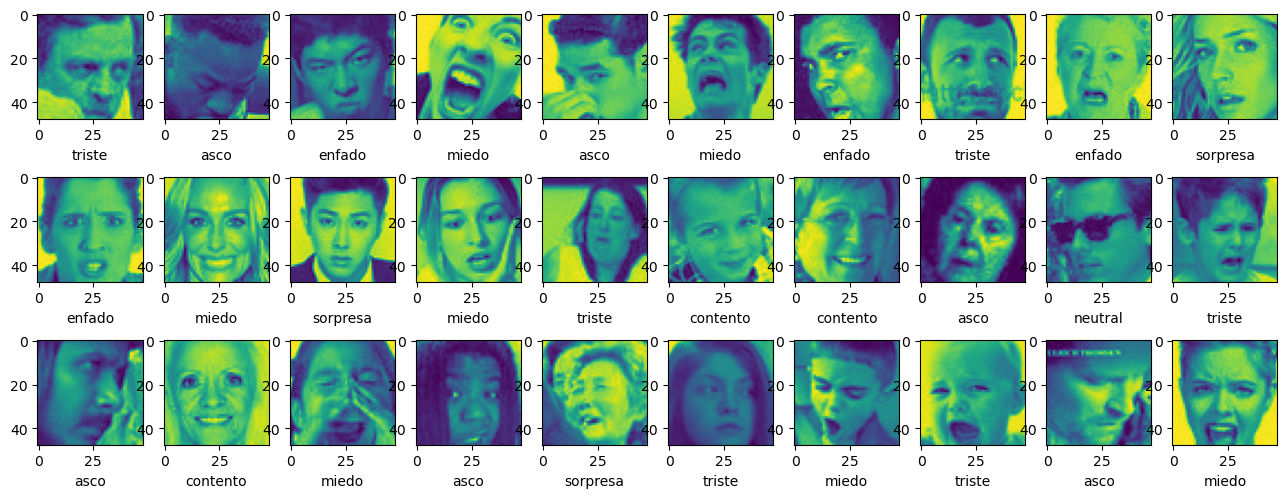

In [4]:
# obtenemos la cantidad de datos, para luego seleccionar aleatoriamente 
cant_datos = datos.shape[0] - 1

fig, ax = plt.subplots(3, 10, figsize=(16,6))
for k in range(3):
    for j in range(10):
        azar = random.sample(range(cant_datos), 1)
        img = np.array(XX.iloc[azar].values)
        img = np.array(img).reshape(48, 48)
        ax[k,j].imshow(img)
        ax[k,j].set_xlabel(yy[azar[0]])
plt.show()

# 3. Distribución de clases

In [5]:
print('Dimensionalidad = ', datos.shape)

Dimensionalidad =  (7000, 2305)


In [6]:
print(datos.groupby('2304').size())

2304
asco        1000
contento    1000
enfado      1000
miedo       1000
neutral     1000
sorpresa    1000
triste      1000
dtype: int64


# 4. Separación de datos y normalización

In [11]:
X = datos.drop(['2304'], axis=1)
y = datos['2304']

# Separa datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

# 5. Entrenamiento del MLP

$${\color{red}{Usted \ debe \ encontrar \ la \ mejor \ configuración \ de \  hiperparametros, \ que \ optimice \ la \ tasa \ de \ aciretos \ en \ la \ predicción}}$$

In [76]:
RNA = MLPClassifier(hidden_layer_sizes=(2000, 800, 400, 30), alpha=0.1, activation='relu', max_iter=800)

# Entrenamiento de RNA
RNA.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(2000, 800, 400, 30), max_iter=800)

In [77]:
RNA.score(X_test, y_test)

0.20114285714285715

# 6. Matriz de confusión y exactitud

In [78]:
from sklearn.metrics import confusion_matrix
pred = RNA.predict(X_test)
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[ 71  16  27  19  72  28  17]
 [ 72  50  54   5  38  12   7]
 [ 66  16  48  19  62  26  18]
 [ 55  13  36  41  43  31  13]
 [ 61  13  41  14 102  26  16]
 [ 74  14  22  24  67  18  31]
 [ 71  13  19  30  70  27  22]]


In [79]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.20114285714285715


# 7. Grabación de modelo

In [80]:
from joblib import dump
dump(RNA, 'modelo_mlp_EXPRE_FAC.joblib')

['modelo_mlp_EXPRE_FAC.joblib']

# 8. Prediccion de nuevo datos

In [81]:
nuevo_dato = [[0.387,0.344,0.338,0.313,0.136,0.083,0.123,0.156,0.069,0.095,0.192,0.176,0.152,0.198,0.196,0.208,0.276,0.327,0.265,0.199,0.163,0.273,0.423,0.337,0.257,0.237,0.202,0.155,0.131,0.182,0.26,0.3,0.248,0.234,0.273,0.205,0.293,0.241,0.151,0.147,0.116,0.136,0.14,0.139,0.225,0.175,0.212,0.2,0.35,0.346,0.33,0.243,0.106,0.119,0.124,0.102,0.104,0.145,0.164,0.172,0.2,0.183,0.253,0.312,0.291,0.2,0.122,0.142,0.231,0.376,0.442,0.348,0.282,0.243,0.204,0.168,0.157,0.2,0.277,0.324,0.317,0.257,0.275,0.256,0.166,0.219,0.174,0.116,0.108,0.116,0.118,0.117,0.181,0.157,0.183,0.186,0.326,0.325,0.297,0.177,0.086,0.131,0.107,0.074,0.106,0.179,0.154,0.152,0.161,0.296,0.345,0.303,0.132,0.072,0.119,0.202,0.307,0.429,0.427,0.359,0.319,0.29,0.252,0.235,0.311,0.426,0.418,0.316,0.286,0.278,0.301,0.263,0.134,0.174,0.136,0.102,0.099,0.091,0.096,0.096,0.127,0.142,0.145,0.173,0.311,0.284,0.256,0.154,0.096,0.107,0.084,0.115,0.154,0.158,0.147,0.187,0.326,0.417,0.259,0.082,0.075,0.099,0.173,0.213,0.286,0.415,0.477,0.461,0.383,0.32,0.322,0.419,0.513,0.531,0.474,0.407,0.301,0.263,0.349,0.3,0.266,0.119,0.101,0.114,0.099,0.081,0.085,0.088,0.092,0.137,0.12,0.164,0.286,0.257,0.225,0.147,0.1,0.084,0.101,0.183,0.162,0.116,0.177,0.288,0.442,0.252,0.112,0.069,0.117,0.188,0.273,0.375,0.472,0.546,0.547,0.454,0.383,0.407,0.481,0.547,0.542,0.51,0.512,0.523,0.475,0.363,0.321,0.439,0.304,0.217,0.092,0.127,0.095,0.074,0.077,0.089,0.074,0.127,0.111,0.15,0.256,0.25,0.213,0.125,0.095,0.089,0.15,0.204,0.115,0.131,0.241,0.378,0.222,0.058,0.079,0.119,0.153,0.18,0.222,0.32,0.402,0.444,0.475,0.441,0.457,0.551,0.635,0.63,0.608,0.635,0.65,0.621,0.621,0.541,0.352,0.349,0.312,0.308,0.141,0.099,0.091,0.069,0.07,0.089,0.065,0.108,0.111,0.132,0.252,0.261,0.189,0.107,0.091,0.095,0.182,0.166,0.119,0.152,0.3,0.298,0.053,0.09,0.116,0.223,0.333,0.316,0.347,0.371,0.395,0.442,0.508,0.592,0.698,0.689,0.72,0.767,0.773,0.76,0.744,0.732,0.681,0.623,0.485,0.206,0.341,0.234,0.205,0.097,0.083,0.069,0.059,0.082,0.063,0.085,0.121,0.119,0.274,0.268,0.167,0.097,0.095,0.096,0.186,0.12,0.127,0.125,0.33,0.09,0.059,0.109,0.18,0.64,0.658,0.603,0.627,0.595,0.615,0.691,0.724,0.826,0.86,0.846,0.843,0.827,0.787,0.764,0.762,0.758,0.72,0.651,0.492,0.387,0.235,0.195,0.158,0.156,0.085,0.073,0.055,0.078,0.065,0.07,0.127,0.115,0.272,0.234,0.12,0.092,0.078,0.097,0.179,0.119,0.097,0.178,0.191,0.105,0.1,0.044,0.407,0.662,0.676,0.711,0.754,0.785,0.808,0.825,0.828,0.824,0.818,0.808,0.795,0.798,0.803,0.79,0.767,0.747,0.754,0.685,0.497,0.396,0.341,0.147,0.111,0.121,0.085,0.058,0.042,0.058,0.062,0.061,0.088,0.127,0.265,0.212,0.11,0.084,0.083,0.124,0.184,0.138,0.073,0.17,0.13,0.141,0.119,0.148,0.51,0.693,0.655,0.702,0.757,0.789,0.802,0.795,0.79,0.78,0.807,0.813,0.82,0.803,0.782,0.76,0.747,0.743,0.748,0.723,0.532,0.361,0.355,0.234,0.119,0.081,0.085,0.058,0.044,0.056,0.06,0.059,0.092,0.132,0.258,0.177,0.103,0.073,0.072,0.12,0.147,0.116,0.092,0.187,0.137,0.176,0.122,0.208,0.574,0.646,0.701,0.741,0.781,0.799,0.795,0.788,0.781,0.781,0.805,0.799,0.788,0.779,0.767,0.749,0.729,0.713,0.735,0.746,0.587,0.329,0.339,0.312,0.13,0.07,0.071,0.048,0.036,0.044,0.047,0.051,0.082,0.123,0.225,0.133,0.095,0.064,0.062,0.095,0.091,0.082,0.125,0.185,0.22,0.22,0.15,0.289,0.66,0.663,0.739,0.77,0.795,0.799,0.79,0.782,0.783,0.781,0.781,0.767,0.75,0.746,0.746,0.742,0.727,0.711,0.702,0.723,0.648,0.371,0.322,0.336,0.138,0.078,0.075,0.044,0.028,0.032,0.039,0.047,0.074,0.107,0.182,0.093,0.094,0.076,0.062,0.09,0.08,0.093,0.172,0.181,0.269,0.241,0.151,0.402,0.698,0.701,0.728,0.764,0.794,0.799,0.788,0.77,0.759,0.746,0.75,0.759,0.758,0.741,0.723,0.718,0.737,0.759,0.696,0.671,0.666,0.446,0.32,0.311,0.127,0.07,0.09,0.056,0.028,0.028,0.04,0.053,0.076,0.101,0.181,0.093,0.092,0.079,0.059,0.071,0.079,0.119,0.221,0.19,0.264,0.27,0.154,0.533,0.709,0.737,0.748,0.776,0.799,0.8,0.784,0.772,0.776,0.778,0.778,0.778,0.766,0.747,0.735,0.739,0.758,0.773,0.751,0.656,0.63,0.48,0.322,0.273,0.114,0.062,0.09,0.058,0.03,0.027,0.035,0.05,0.072,0.1,0.218,0.124,0.087,0.076,0.046,0.053,0.1,0.15,0.229,0.192,0.278,0.308,0.211,0.619,0.728,0.764,0.767,0.798,0.814,0.795,0.768,0.765,0.797,0.825,0.821,0.801,0.779,0.764,0.759,0.765,0.773,0.777,0.783,0.706,0.636,0.541,0.39,0.278,0.121,0.065,0.078,0.058,0.035,0.028,0.029,0.038,0.069,0.106,0.252,0.144,0.082,0.07,0.045,0.053,0.133,0.193,0.227,0.2,0.307,0.304,0.232,0.563,0.656,0.674,0.731,0.778,0.81,0.795,0.757,0.747,0.776,0.809,0.821,0.827,0.814,0.788,0.757,0.748,0.77,0.793,0.763,0.76,0.7,0.646,0.508,0.333,0.141,0.061,0.078,0.066,0.05,0.035,0.028,0.04,0.079,0.12,0.166,0.148,0.07,0.082,0.07,0.059,0.162,0.21,0.213,0.237,0.284,0.34,0.28,0.569,0.64,0.584,0.574,0.629,0.699,0.754,0.727,0.715,0.708,0.774,0.793,0.83,0.762,0.736,0.719,0.708,0.779,0.8,0.8,0.759,0.754,0.718,0.651,0.484,0.247,0.047,0.074,0.052,0.06,0.029,0.029,0.05,0.045,0.099,0.163,0.125,0.08,0.061,0.071,0.114,0.19,0.247,0.256,0.221,0.245,0.306,0.293,0.614,0.66,0.659,0.6,0.521,0.529,0.618,0.697,0.685,0.697,0.71,0.774,0.779,0.763,0.697,0.683,0.707,0.741,0.678,0.639,0.656,0.611,0.656,0.625,0.62,0.426,0.186,0.026,0.1,0.058,0.047,0.061,0.018,0.04,0.091,0.145,0.117,0.087,0.093,0.092,0.117,0.193,0.266,0.27,0.315,0.254,0.223,0.289,0.431,0.341,0.223,0.188,0.193,0.238,0.418,0.542,0.596,0.661,0.673,0.748,0.76,0.751,0.675,0.627,0.632,0.579,0.524,0.538,0.573,0.592,0.582,0.627,0.56,0.5,0.338,0.054,0.094,0.062,0.067,0.064,0.024,0.051,0.08,0.162,0.128,0.087,0.157,0.172,0.142,0.223,0.284,0.324,0.278,0.244,0.219,0.232,0.327,0.517,0.26,0.107,0.177,0.141,0.357,0.457,0.507,0.54,0.666,0.744,0.771,0.678,0.587,0.475,0.423,0.295,0.249,0.225,0.309,0.411,0.519,0.597,0.618,0.534,0.439,0.204,0.071,0.072,0.068,0.037,0.072,0.079,0.079,0.165,0.093,0.077,0.138,0.183,0.19,0.231,0.294,0.377,0.371,0.291,0.171,0.274,0.574,0.749,0.276,0.099,0.084,0.316,0.727,0.618,0.576,0.663,0.697,0.787,0.777,0.646,0.524,0.448,0.448,0.345,0.091,0.164,0.092,0.273,0.284,0.387,0.548,0.587,0.448,0.39,0.183,0.098,0.065,0.047,0.081,0.09,0.101,0.162,0.098,0.15,0.143,0.15,0.193,0.208,0.325,0.396,0.402,0.261,0.169,0.294,0.61,0.646,0.54,0.354,0.398,0.592,0.814,0.748,0.623,0.691,0.772,0.819,0.773,0.717,0.579,0.587,0.688,0.638,0.138,0.146,0.139,0.439,0.575,0.336,0.51,0.496,0.439,0.519,0.398,0.152,0.066,0.088,0.054,0.072,0.119,0.217,0.191,0.231,0.271,0.235,0.186,0.229,0.357,0.438,0.388,0.253,0.225,0.327,0.734,0.739,0.71,0.748,0.729,0.76,0.765,0.739,0.703,0.735,0.739,0.81,0.772,0.749,0.648,0.638,0.755,0.728,0.361,0.178,0.211,0.576,0.675,0.491,0.489,0.522,0.56,0.593,0.527,0.242,0.088,0.108,0.069,0.059,0.103,0.258,0.237,0.188,0.379,0.369,0.178,0.261,0.316,0.439,0.438,0.227,0.188,0.366,0.748,0.774,0.795,0.741,0.725,0.711,0.706,0.683,0.746,0.782,0.819,0.79,0.792,0.744,0.706,0.631,0.729,0.729,0.726,0.603,0.558,0.626,0.583,0.632,0.636,0.631,0.676,0.636,0.535,0.321,0.104,0.093,0.117,0.052,0.072,0.26,0.25,0.222,0.308,0.398,0.302,0.25,0.34,0.462,0.411,0.223,0.274,0.423,0.774,0.799,0.768,0.77,0.757,0.768,0.729,0.74,0.748,0.803,0.805,0.797,0.803,0.757,0.765,0.724,0.651,0.707,0.684,0.702,0.705,0.709,0.712,0.708,0.703,0.697,0.695,0.656,0.522,0.33,0.142,0.062,0.087,0.099,0.06,0.275,0.262,0.225,0.262,0.456,0.412,0.284,0.375,0.477,0.391,0.247,0.34,0.482,0.785,0.808,0.795,0.829,0.786,0.782,0.795,0.757,0.711,0.735,0.783,0.814,0.779,0.736,0.759,0.719,0.698,0.722,0.746,0.738,0.739,0.747,0.744,0.728,0.703,0.681,0.667,0.643,0.505,0.274,0.127,0.07,0.098,0.113,0.094,0.268,0.275,0.24,0.232,0.459,0.438,0.268,0.404,0.521,0.37,0.281,0.433,0.575,0.804,0.822,0.824,0.794,0.817,0.841,0.788,0.712,0.671,0.733,0.789,0.816,0.777,0.737,0.675,0.674,0.747,0.753,0.738,0.761,0.765,0.772,0.769,0.749,0.717,0.678,0.652,0.624,0.478,0.203,0.093,0.054,0.083,0.106,0.132,0.248,0.289,0.255,0.234,0.391,0.398,0.253,0.402,0.567,0.335,0.286,0.482,0.637,0.811,0.823,0.834,0.851,0.828,0.837,0.736,0.679,0.624,0.732,0.799,0.792,0.783,0.746,0.604,0.614,0.721,0.798,0.771,0.781,0.779,0.78,0.767,0.742,0.714,0.675,0.642,0.597,0.436,0.132,0.069,0.052,0.086,0.112,0.172,0.237,0.318,0.285,0.265,0.314,0.385,0.306,0.382,0.569,0.283,0.272,0.478,0.673,0.801,0.82,0.83,0.834,0.818,0.789,0.721,0.665,0.675,0.745,0.789,0.856,0.809,0.686,0.62,0.614,0.724,0.801,0.793,0.805,0.795,0.777,0.745,0.722,0.693,0.66,0.63,0.574,0.356,0.075,0.07,0.096,0.144,0.156,0.187,0.212,0.334,0.373,0.316,0.259,0.347,0.349,0.379,0.522,0.244,0.274,0.477,0.695,0.801,0.818,0.824,0.837,0.821,0.742,0.7,0.493,0.481,0.551,0.718,0.7,0.723,0.61,0.622,0.558,0.722,0.79,0.821,0.805,0.79,0.756,0.726,0.702,0.685,0.654,0.622,0.562,0.273,0.051,0.08,0.122,0.184,0.168,0.16,0.209,0.277,0.423,0.354,0.264,0.287,0.306,0.386,0.44,0.217,0.308,0.483,0.712,0.793,0.805,0.807,0.827,0.782,0.781,0.835,0.606,0.388,0.315,0.444,0.554,0.448,0.282,0.308,0.417,0.726,0.793,0.809,0.788,0.779,0.747,0.718,0.698,0.684,0.647,0.608,0.531,0.199,0.058,0.078,0.081,0.152,0.165,0.148,0.231,0.187,0.39,0.354,0.323,0.27,0.257,0.394,0.37,0.197,0.332,0.489,0.709,0.773,0.78,0.778,0.785,0.786,0.81,0.8,0.812,0.745,0.611,0.438,0.391,0.356,0.47,0.558,0.676,0.783,0.769,0.794,0.785,0.78,0.752,0.722,0.698,0.673,0.629,0.582,0.482,0.146,0.076,0.068,0.031,0.106,0.171,0.185,0.334,0.112,0.259,0.339,0.314,0.324,0.278,0.357,0.309,0.179,0.368,0.483,0.7,0.749,0.733,0.755,0.757,0.774,0.79,0.775,0.762,0.766,0.775,0.799,0.72,0.783,0.746,0.749,0.708,0.728,0.789,0.763,0.789,0.765,0.765,0.73,0.678,0.647,0.598,0.547,0.393,0.186,0.11,0.069,0.024,0.118,0.215,0.187,0.331,0.214,0.162,0.272,0.266,0.297,0.252,0.326,0.261,0.199,0.363,0.476,0.689,0.731,0.728,0.733,0.789,0.739,0.749,0.761,0.716,0.719,0.753,0.739,0.786,0.753,0.703,0.7,0.673,0.73,0.777,0.785,0.766,0.748,0.739,0.713,0.672,0.633,0.575,0.522,0.376,0.168,0.114,0.104,0.072,0.113,0.185,0.171,0.359,0.316,0.154,0.201,0.194,0.226,0.213,0.319,0.216,0.229,0.369,0.486,0.691,0.719,0.722,0.72,0.723,0.769,0.715,0.677,0.662,0.68,0.764,0.76,0.763,0.75,0.683,0.618,0.632,0.723,0.728,0.746,0.752,0.736,0.72,0.695,0.667,0.617,0.554,0.501,0.309,0.104,0.075,0.102,0.105,0.114,0.194,0.235,0.313,0.262,0.211,0.226,0.224,0.24,0.231,0.305,0.186,0.255,0.348,0.505,0.703,0.711,0.714,0.71,0.746,0.699,0.684,0.579,0.518,0.477,0.443,0.58,0.6,0.612,0.623,0.637,0.619,0.698,0.739,0.739,0.731,0.73,0.704,0.689,0.66,0.603,0.538,0.474,0.202,0.065,0.099,0.151,0.164,0.106,0.14,0.188,0.311,0.198,0.185,0.269,0.257,0.277,0.303,0.271,0.17,0.251,0.317,0.514,0.706,0.695,0.696,0.707,0.689,0.69,0.61,0.47,0.319,0.253,0.26,0.21,0.265,0.217,0.297,0.512,0.547,0.616,0.725,0.704,0.706,0.716,0.691,0.682,0.645,0.587,0.52,0.428,0.121,0.062,0.12,0.175,0.187,0.119,0.138,0.21,0.268,0.174,0.116,0.294,0.258,0.275,0.338,0.24,0.174,0.249,0.306,0.527,0.697,0.691,0.682,0.706,0.713,0.663,0.573,0.361,0.134,0.349,0.627,0.407,0.478,0.372,0.175,0.265,0.455,0.596,0.685,0.701,0.688,0.699,0.677,0.678,0.627,0.568,0.497,0.34,0.061,0.062,0.107,0.164,0.177,0.161,0.197,0.323,0.186,0.136,0.085,0.239,0.292,0.281,0.3,0.2,0.178,0.251,0.306,0.528,0.67,0.684,0.676,0.701,0.689,0.651,0.509,0.238,0.27,0.347,0.199,0.258,0.301,0.339,0.161,0.154,0.407,0.614,0.646,0.661,0.685,0.678,0.659,0.658,0.596,0.535,0.436,0.205,0.028,0.079,0.12,0.195,0.196,0.19,0.193,0.334,0.309,0.172,0.086,0.07,0.254,0.258,0.214,0.157,0.171,0.243,0.31,0.516,0.636,0.671,0.66,0.69,0.678,0.663,0.478,0.536,0.765,0.747,0.612,0.511,0.534,0.593,0.571,0.47,0.431,0.581,0.657,0.663,0.674,0.654,0.629,0.631,0.557,0.489,0.37,0.086,0.036,0.084,0.1,0.177,0.175,0.189,0.196,0.368,0.225,0.133,0.099,0.094,0.232,0.225,0.113,0.161,0.175,0.222,0.279,0.504,0.589,0.647,0.643,0.659,0.677,0.628,0.583,0.717,0.852,0.864,0.867,0.877,0.895,0.799,0.864,0.758,0.525,0.607,0.649,0.629,0.638,0.626,0.623,0.588,0.519,0.41,0.212,0.007,0.041,0.108,0.13,0.165,0.157,0.163,0.23,0.378,0.191,0.162,0.134,0.079,0.157,0.197,0.168,0.198,0.176,0.18,0.229,0.448,0.558,0.598,0.613,0.647,0.636,0.636,0.593,0.587,0.619,0.639,0.682,0.733,0.731,0.729,0.741,0.651,0.585,0.621,0.6,0.647,0.647,0.612,0.545,0.518,0.457,0.258,0.064,0.016,0.049,0.098,0.184,0.143,0.128,0.147,0.207,0.382,0.176,0.125,0.068,0.013,0.132,0.324,0.382,0.256,0.163,0.144,0.19,0.369,0.508,0.553,0.577,0.595,0.635,0.631,0.569,0.494,0.505,0.525,0.479,0.449,0.485,0.472,0.483,0.503,0.6,0.644,0.6,0.573,0.595,0.55,0.521,0.462,0.286,0.094,0.03,0.058,0.102,0.13,0.269,0.165,0.136,0.17,0.217,0.419,0.197,0.168,0.07,0.114,0.383,0.539,0.494,0.321,0.147,0.135,0.165,0.253,0.404,0.504,0.576,0.582,0.599,0.604,0.569,0.461,0.459,0.512,0.502,0.528,0.508,0.484,0.461,0.46,0.531,0.549,0.592,0.583,0.527,0.492,0.436,0.283,0.087,0.009,0.046,0.061,0.118,0.136,0.253,0.19,0.143,0.183,0.226,0.432,0.189,0.155,0.247,0.458,0.606,0.623,0.564,0.354,0.15,0.128,0.145,0.15,0.259,0.371,0.519,0.596,0.598,0.598,0.56,0.443,0.392,0.408,0.416,0.485,0.485,0.468,0.397,0.41,0.561,0.574,0.562,0.55,0.507,0.433,0.24,0.062,0.02,0.027,0.035,0.062,0.125,0.137,0.183,0.221,0.166,0.2,0.243,0.414,0.195,0.271,0.486,0.639,0.649,0.648,0.626,0.406,0.164,0.131,0.15,0.133,0.164,0.212,0.351,0.489,0.611,0.62,0.598,0.522,0.474,0.423,0.365,0.369,0.369,0.401,0.46,0.527,0.58,0.578,0.559,0.506,0.364,0.213,0.055,0.01,0.029,0.039,0.049,0.075,0.142,0.15,0.145,0.259,0.207,0.229,0.266,0.392,0.243,0.502,0.646,0.635,0.7,0.702,0.609,0.464,0.179,0.14,0.16,0.143,0.135,0.131,0.182,0.276,0.459,0.593,0.663,0.661,0.641,0.621,0.629,0.64,0.654,0.593,0.612,0.648,0.603,0.563,0.432,0.27,0.116,0.012,0.005,0.036,0.013,0.01,0.053,0.077,0.139,0.141,0.141,0.246,0.211,0.224,0.244,0.327,0.238,0.409,0.668,0.719,0.69,0.716,0.668,0.441,0.193,0.149,0.146,0.127,0.128,0.14,0.116,0.14,0.261,0.506,0.656,0.71,0.73,0.745,0.781,0.765,0.736,0.725,0.676,0.635,0.558,0.421,0.151,0.023,0.012,0.034,0.031,0.022,0.027,0.028,0.045,0.1,0.15,0.139,0.175,0.241,0.219,0.222,0.234,0.288]]

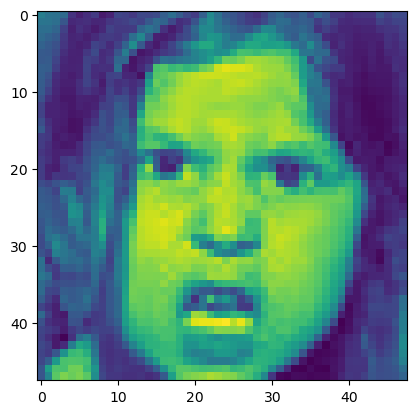

In [82]:
plt.imshow(np.array(nuevo_dato).reshape(48,48))

In [83]:
from joblib import load
modelo_recuperado = load('modelo_mlp_EXPRE_FAC.joblib')
modelo_recuperado.predict(nuevo_dato)

c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['asco'], dtype='<U8')

# **PRÁCTICA**

Realice las adaptaciones del presente aplicativo, para:
1. Tomar fotos con el celular de rostros de: usted y sus compañeros con expresiones faciales de: asco, contento, enfado, miedo, neutral, sorpresa y triste
2. Importar la foto a la presente aplicación
3. Dar el formato a escala de grises y establecer a una resolución de 48x48 pixeles
4. Realizar las predicciones con el modelo de MLP entrenado
5. Mostrar soluciones

# **Vectorizar las imagenes nuevas**

In [84]:
from os import listdir
from os.path import isfile
import cv2

# Funcion para enlistar los archivos de una carpeta
def ArchivoDir(path):
    return [obj for obj in listdir(path) if isfile(path + obj)]

# Ruta inicial de fotografias
Ruta = './fotos/'
files = ArchivoDir(Ruta)

# Array para almacenar datos vectorizados
pixel = []
# Repeticion por cada archivo de imagen
for file in files:
    # Convierte imagen en escala de grices
    image = cv2.imread(Ruta + file, cv2.IMREAD_GRAYSCALE)
    # Reescala la imagen a una dimension de 48x48 pixeles
    image_rescaled = cv2.resize(image, (48,48), interpolation=cv2.INTER_AREA)
    try:
        # Obtienen imagen vectorizado y etiquetado
        img = np.reshape(image_rescaled, (2304))
        #img = np.append(img,dir)
        pixel.append(img)
    except:
        # Mostrar error de imagenes que no pudieron ser procesados
        print('Error -> ' + Ruta + file)

# Convierte array de imagenes a dataframe de pandas
df = pd.DataFrame(pixel)
    
# Grabar archivo en formato csv
df.to_csv('./fotos.csv', index=False, sep=',')

# **Cargar datos nuevos**

In [85]:
# Dataset de nuevas imagenes
nuevos_datos = pd.read_csv('./fotos.csv', sep=',')
nuevos_datos.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,171,143,171,157,162,165,148,166,161,149,...,79,74,78,73,78,81,75,81,67,74
1,72,75,95,191,213,185,195,184,126,116,...,63,60,61,60,59,101,118,125,139,147
2,156,156,165,162,165,144,141,140,144,167,...,70,88,99,110,106,93,89,102,118,106
3,235,236,234,233,224,219,219,221,216,184,...,49,52,58,68,132,159,212,223,224,225
4,53,51,50,48,44,47,47,45,43,42,...,184,182,181,179,175,123,52,47,44,49


# **Normalizacion de datos**

In [86]:
# Transformación por amplitud [0..1]
def Normalizacion_Amplitud(atributo):
    return (atributo - atributo.min()) / (atributo.max() - atributo.min())

# Normaliza todos los atributos del dataframe
def NormalizarTodo(datos):
    for col in datos.columns:
        datos[col] = Normalizacion_Amplitud(datos[col])
    return datos

In [87]:
nuevos_datos = NormalizarTodo(nuevos_datos)
nuevos_datos.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.678392,0.520619,0.657609,0.589189,0.661202,0.711230,0.612022,0.699454,0.696133,0.641304,...,0.147059,0.109453,0.102564,0.067358,0.097938,0.065217,0.114428,0.165049,0.169643,0.292490
1,0.180905,0.170103,0.244565,0.772973,0.939891,0.818182,0.868852,0.797814,0.502762,0.461957,...,0.068627,0.039801,0.015385,0.000000,0.000000,0.173913,0.328358,0.378641,0.491071,0.581028
2,0.603015,0.587629,0.625000,0.616216,0.677596,0.598930,0.573770,0.557377,0.602210,0.739130,...,0.102941,0.179104,0.210256,0.259067,0.242268,0.130435,0.184080,0.266990,0.397321,0.418972
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.831522,...,0.000000,0.000000,0.000000,0.041451,0.376289,0.489130,0.796020,0.854369,0.870536,0.889328
4,0.085427,0.046392,0.000000,0.000000,0.016393,0.080214,0.060109,0.038251,0.044199,0.059783,...,0.661765,0.646766,0.630769,0.616580,0.597938,0.293478,0.000000,0.000000,0.066964,0.193676


c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warni

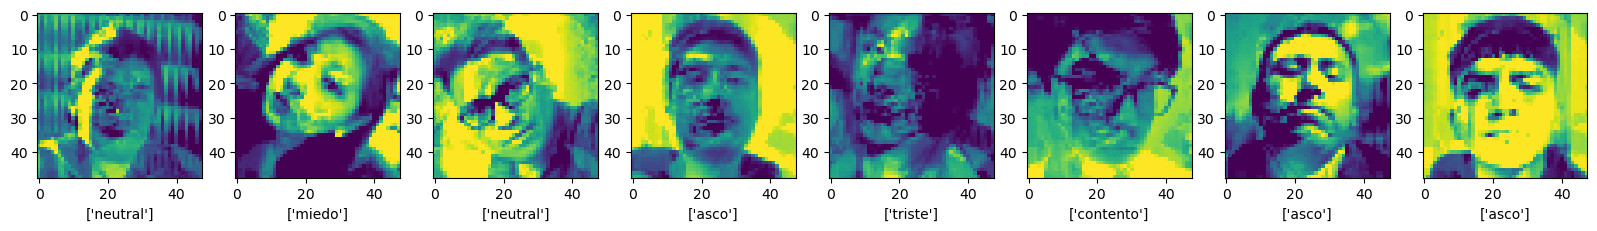

[array(['neutral'], dtype='<U8'), array(['miedo'], dtype='<U8'), array(['neutral'], dtype='<U8'), array(['asco'], dtype='<U8'), array(['triste'], dtype='<U8'), array(['contento'], dtype='<U8'), array(['asco'], dtype='<U8'), array(['asco'], dtype='<U8')]


In [104]:
prediccion = []

fig, ax = plt.subplots(1, 8, figsize=(20,20))

for i in range(len(nuevos_datos.index)):
    n_foto = [(np.array(nuevos_datos.loc[i]))]
    pred = modelo_recuperado.predict(n_foto)
    prediccion.append(pred)
    n_foto = np.array(n_foto).reshape(48, 48)
    ax[i].imshow(n_foto)
    ax[i].set_xlabel(prediccion[i])

plt.show()
print(prediccion)